In [2]:
import pandas as pd

In [4]:
woe = pd.read_csv("../data/woedf.csv")

In [15]:
woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1237
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Variable         1238 non-null   object 
 1   2cutoff          1063 non-null   string 
 2   Cutoff           1171 non-null   object 
 3   N                1238 non-null   int64  
 4   Events           1238 non-null   int64  
 5   % of Events      1238 non-null   float64
 6   Non-Events       1238 non-null   int64  
 7   % of Non-Events  1238 non-null   float64
 8   WoE              1238 non-null   float64
 9   IV               1238 non-null   float64
dtypes: float64(4), int64(3), object(2), string(1)
memory usage: 106.4+ KB


In [18]:
woe.head(1)

,Variable,2cutoff,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,P_2,"(0.889, 0.941]","(-0.46, 0.319]",548547,424060,0.307765,124487,0.029971,-2.329107,0.647012


In [14]:
woe['2cutoff'] =woe['2cutoff'].astype("string")

In [17]:
woe['min'] = woe['2cutoff'].split()

AttributeError: 'Series' object has no attribute 'split'

In [19]:
woe.head(

)

,Variable,2cutoff,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,P_2,"(0.889, 0.941]","(-0.46, 0.319]",548547,424060,0.307765,124487,0.029971,-2.329107,0.647012
1,P_2,"(0.889, 0.941]","(0.319, 0.433]",548548,339707,0.246545,208841,0.050280,-1.589943,0.312051
2,P_2,"(0.941, 1.01]","(0.433, 0.526]",548545,264940,0.192282,283605,0.068280,-1.035354,0.128387
3,P_2,"(0.941, 1.01]","(0.526, 0.611]",548547,174087,0.126345,374460,0.090154,-0.337503,0.012215
4,P_2,"(0.941, 1.01]","(0.611, 0.694]",548546,92161,0.066887,456385,0.109877,0.496367,0.021339


In [21]:
woe['test'] = pd.Interval(woe['2cutoff'],2)

ValueError: Only numeric, Timestamp and Timedelta endpoints are allowed when constructing an Interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

predictions = [0.9, 0.3, 0.8, 0.75, 0.65, 0.6, 0.78, 0.7, 0.05, 0.4, 0.4, 0.05, 0.5, 0.1, 0.1]
actual = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [2]:
# Copied from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [3]:
gini_predictions = gini(actual, predictions)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predictions)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))


Gini: 0.189, Max. Gini: 0.300, Normalized Gini: 0.630


/tmp/ipykernel_56325/906356561.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)


In [5]:
# Sort the actual values by the predictions
data = zip(actual, predictions)
print(data)
sorted_data = sorted(data, key=lambda d: d[1])
print(sorted_data)
sorted_actual = [d[0] for d in sorted_data]
print(sorted_actual)

[(0, 0.05), (0, 0.05), (0, 0.1), (0, 0.1), (1, 0.3), (0, 0.4), (0, 0.4), (0, 0.5), (1, 0.6), (1, 0.65), (0, 0.7), (1, 0.75), (0, 0.78), (1, 0.8), (1, 0.9)]
[0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]


In [7]:
cumulative_actual = np.cumsum(sorted_actual)
cumulative_actual

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 4, 4, 5, 6])

In [8]:
cumulative_index = np.arange(1, len(cumulative_actual)+1)


In [10]:
cumulative_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

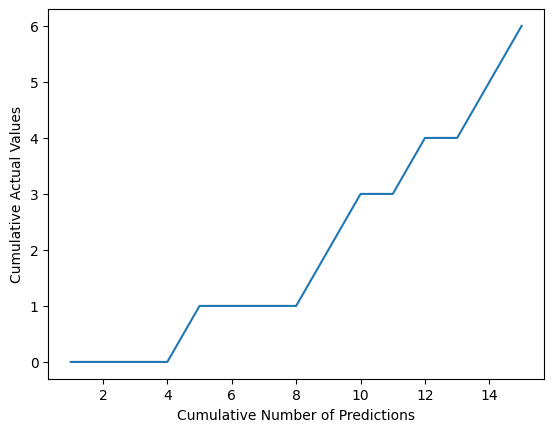

In [11]:
plt.plot(cumulative_index, cumulative_actual)
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

In [12]:
cumulative_actual_shares = cumulative_actual / sum(actual)
cumulative_actual_shares

array([0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.16666667, 0.16666667, 0.16666667, 0.33333333, 0.5       ,
       0.5       , 0.66666667, 0.66666667, 0.83333333, 1.        ])